In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import decimal
import scipy

In [ ]:
##### ES 1 ######

def func(N, vander=False, hilbert=False):
  if vander:
    x_input = np.arange(1, N+1, 1)
    A = np.vander(x_input, N=N)
  elif hilbert:
    A = scipy.linalg.hilbert(N)
  else:
    A = np.random.rand(N,N)
  x_true = np.ones(N)
  b = A @ x_true
  cond_2 = np.linalg.cond(A, p=2)
  cond_inf = np.linalg.cond(A, p=np.inf)
  x = np.linalg.solve(A, b)
  err_rel = np.linalg.norm((x-x_true), 2) / np.linalg.norm((x_true), 2)
  return err_rel, cond_2, cond_inf

In [ ]:
def render(nums, vander=False, hilbert=False):
  errs = []
  cond_2_list = []
  cond_inf_list = []
  for n in nums:
    res = func(n, vander, hilbert)
    errs.append(res[0])
    cond_2_list.append(res[1])
    cond_inf_list.append(res[2])
  if not vander and not hilbert:
    matrix_name = "Random matrix"
  elif vander:
    matrix_name = "Vander matrix"
  else:
    matrix_name = "Hilbert matrix"

  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

  # Create a new window for the relative errors graph
  ax[0].plot(nums, errs, marker='o', linestyle='-')
  ax[0].set_title(f'Relative Errors vs. n in {matrix_name}')
  ax[0].set_xlabel('n')
  ax[0].set_ylabel(f'Relative Error in {matrix_name}')
  ax[0].grid(True)

  # Create a new window for the condition numbers graph
  ax[1].plot(nums, cond_2_list, label='K2(A)', marker='o', linestyle='-', color='blue')
  ax[1].plot(nums, cond_inf_list, label='K∞(A)', marker='x', linestyle='--', color='red')
  ax[1].set_title(f'Condition Numbers vs. n in {matrix_name}')
  ax[1].set_xlabel('n')
  ax[1].set_ylabel(f'Condition Number in {matrix_name}')
  ax[1].legend()
  ax[1].grid(True)

  plt.show()

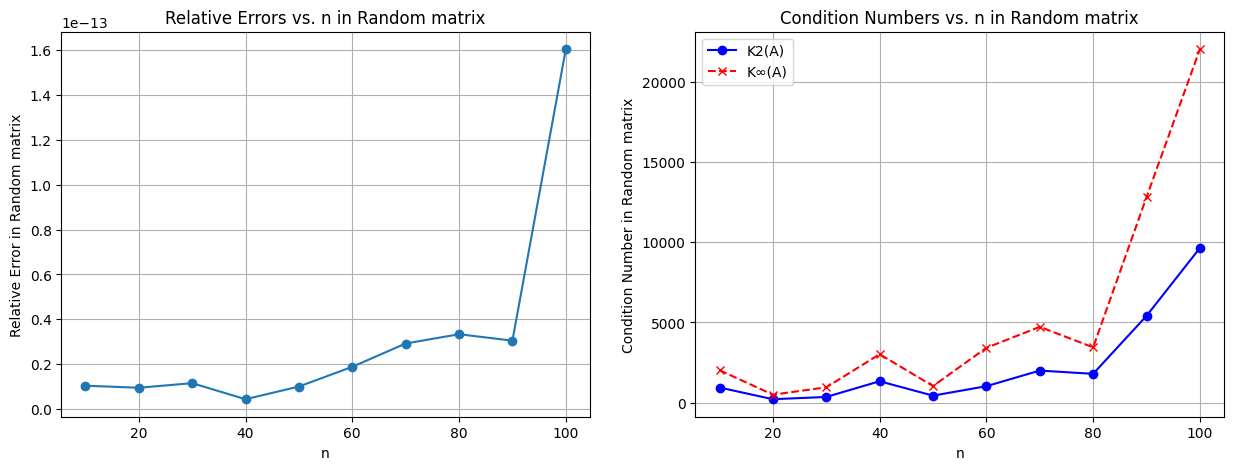

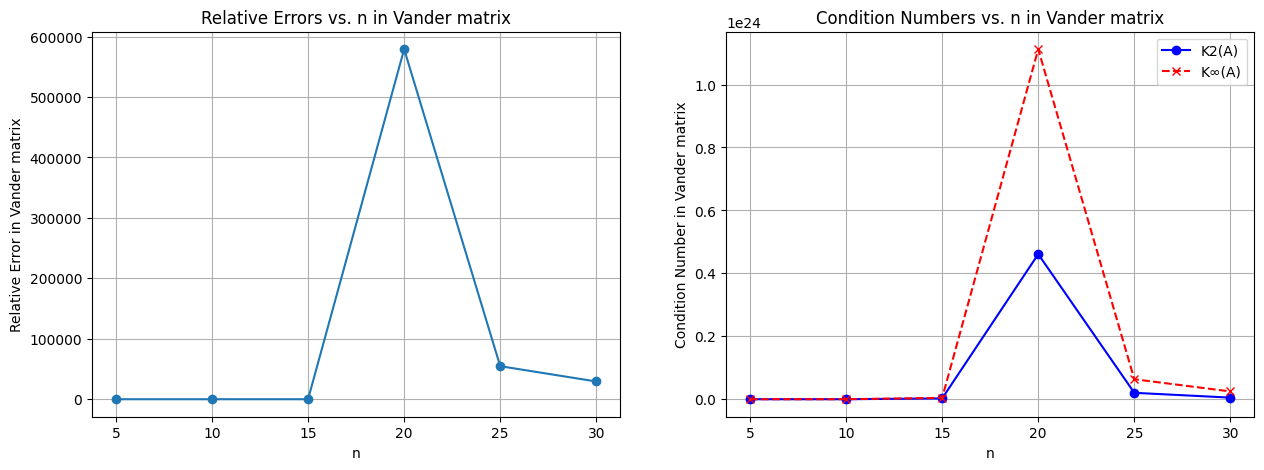

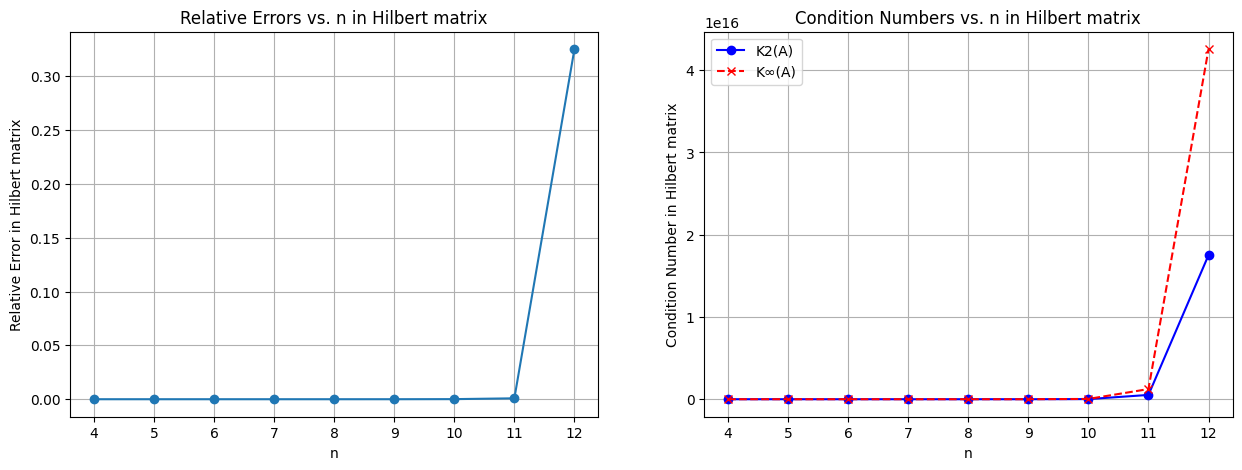

In [ ]:
render(range(10, 110, 10))
render(range(5, 35, 5), vander=True)
render(range(4, 13), hilbert=True)

In [ ]:
eps = 1
while float(1+eps) > 1:
  eps = eps/2
print(decimal.Decimal.from_float(eps*2))

2.220446049250313080847263336181640625E-16


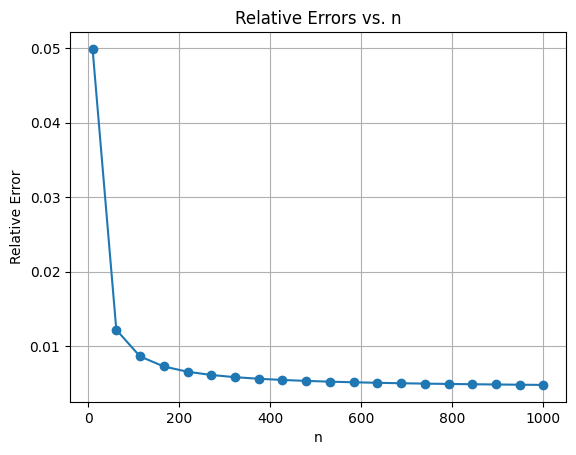

In [ ]:
##### ES 2.2 ######

res = []
err = []
e = 2.73
nums = np.linspace(10, 1000, 20)

for n in nums:
  a = (1+1/n)**n
  res.append(a)
  err.append((e-a)/e)

plt.figure(1)
plt.plot(nums, err, marker='o', linestyle='-')
plt.title('Relative Errors vs. n')
plt.xlabel('n')
plt.ylabel('Relative Error')
plt.grid(True)
plt.show()

In [ ]:
##### ES 2.3 ######

A = np.array([[4, 2], [1, 3]])
B = np.array([[4, 2], [2, 1]])
rank_a = np.linalg.matrix_rank(A)
rank_b = np.linalg.matrix_rank(B)
print(f"rank A:{rank_a}, rank B:{rank_b}")
eigenvalues_a, eigenvectors_a = np.linalg.eig(A)
eigenvalues_b, eigenvectors_b = np.linalg.eig(B)
print(f"eigenvalues: {eigenvalues_a}, {eigenvalues_b}")
print(f"eigenvectors A: \n{eigenvectors_a}")
print(f"eigenvectors B: \n{eigenvectors_b}")

#Aggiungere matrici di esempio

rank A:2, rank B:1
eigenvalues: [5. 2.], [5. 0.]
eigenvectors A: 
[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]
eigenvectors B: 
[[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]
